# Product Demand Prediciton

### 1. Importing all the necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

### 2. Loading the demand.csv file as a dataframe

In [2]:
df = pd.read_csv("C:/Users/annar/Downloads/demand.csv")
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


### 3. Performing data preprocessing

In [3]:
df.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [4]:
# since there is one null value in Total price column, use dropna to remove it
df = df.dropna()
df.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

### 4. Visualizing the data by plotting

<AxesSubplot: xlabel='Units Sold', ylabel='Total Price'>

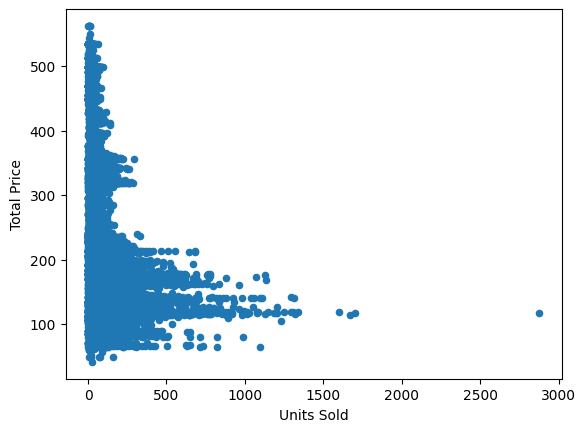

In [5]:
fig = df.plot.scatter(x="Units Sold", y="Total Price")
fig

We can see that most of the data points show the sales of the product is increasing as the price is decreasing with some exceptions.

The correlation table is as follows: 
                   ID  Store ID  Total Price  Base Price  Units Sold
ID           1.000000  0.007461     0.008473    0.018911   -0.010608
Store ID     0.007461  1.000000    -0.038315   -0.038855   -0.004369
Total Price  0.008473 -0.038315     1.000000    0.958885   -0.235625
Base Price   0.018911 -0.038855     0.958885    1.000000   -0.140022
Units Sold  -0.010608 -0.004369    -0.235625   -0.140022    1.000000


<AxesSubplot: >

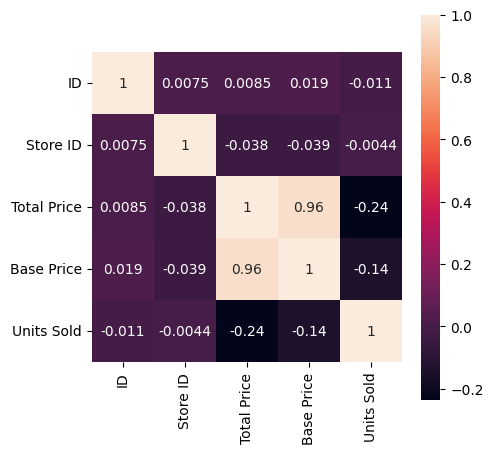

In [15]:
correlation = df.corr()
print("The correlation table is as follows: ")
print(correlation)
plt.figure(figsize=(5,5))
sns.heatmap(correlation, vmax=1, square =True, annot =True)

#### 5. Creating a model for prediciton
Now let’s move to the task of training a machine learning model to predict the demand for the product at different prices. I will choose the Total Price and the Base Price column as the features to train the model, and the Units Sold column as labels for the model

In [59]:
x = df[["Total Price", "Base Price"]]
y = df["Units Sold"]

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state = 50)

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [61]:
model.score(xtest, ytest)

0.40273114857750847

Lets check the prediciton of number of quantity by the model for a custom "Total Price" and "Base Price"

In [63]:
feature = np.array([[133.00, 140.00]])
model.predict(feature)

c:\Users\annar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([27.])